---
## Step 0: Load The Data

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print('done')

Untaring file...
done


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
label_shape = y_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Type of x_train is %s, y_train is %s" % (type(X_train), type(y_train)))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("X data type =", X_train.dtype)  # data type uint8 cause potential problem for data transformation
print("Label data shape =", label_shape)
print("y data type =", y_train.dtype)
print("Number of classes =", n_classes)

Type of x_train is <class 'numpy.ndarray'>, y_train is <class 'numpy.ndarray'>
Number of training examples = 50000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
X data type = uint8
Label data shape = ()
y data type = uint8
Number of classes = 10


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

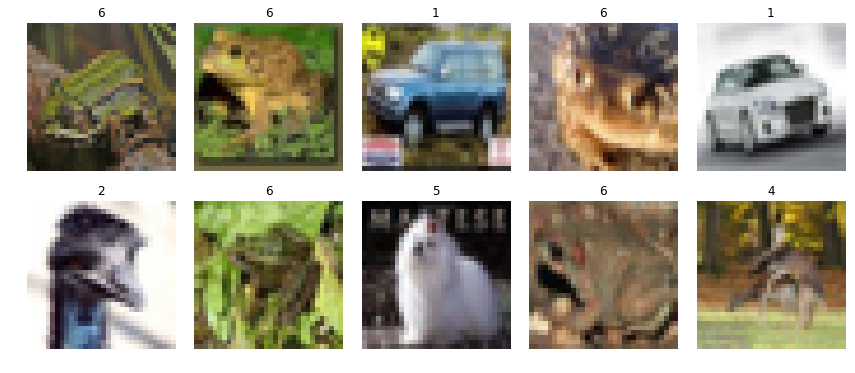

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

# show 10 random images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, n_train)
    image = X_train[index].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

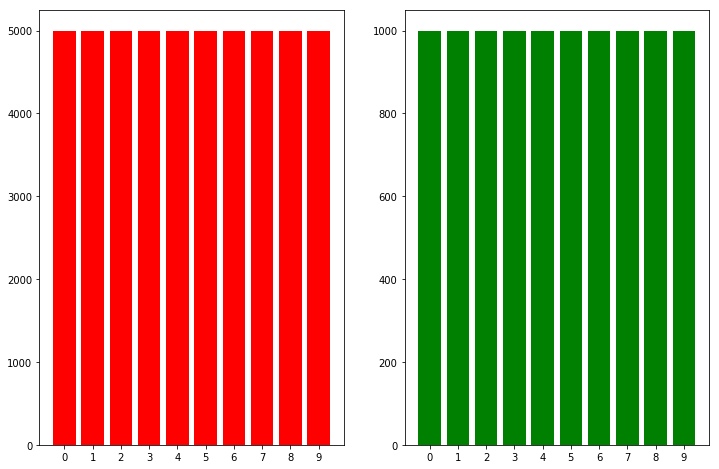

In [4]:
from collections import Counter

def count(y_labels):
    labels, values = zip(*sorted(Counter(y_labels).items()))
    return labels, values

data = [y_train, y_test]
colors = ['r', 'g']

fig = plt.figure()
for i, y in enumerate(data):
    labels, values = count(y)
    a = fig.add_subplot(1, len(data), i+1)
    plt.bar(labels, values, color=colors[i])
    plt.xticks(range(len(labels)), labels)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(data))
plt.show()

## Notes
* The label distributions between training, validation and test datum are very similar
* However, Imbalance exists between different labels. For training set, some label has more than 2000 instances, some other only has around 200 instances.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
#X_test, y_test = test['features'], test['labels']

def to_grayscale(images):
    """
    convert rgb images to gray scale image
    
    images: numpy array
       it can be 3D (width, length, depth) for one image
       or 4D (n_samples, width, length, depth) for n_samples images
    """
    return np.sum(images/images.shape[-1], axis=-1, keepdims=True)


def normalize(images):
    """
    normalize image data
    
    images: numpy array
        it can be 3D (width, length, depth) for one image
       or 4D (n_samples, width, length, depth) for n_samples images
    """
    res = (images - 128.0) / 128.0
    return res

# test
index = random.randint(0, n_train)
image = X_train[index]
print(image.dtype)
img_min, img_max = image.min(), image.max()
print("Before: Image min is %s, max is %s" % (img_min, img_max))
image = normalize(image)
print(image.dtype)
img_min, img_max = image.min(), image.max()
print("After: Image min is %s, max is %s" % (img_min, img_max))

index = random.randint(0, n_train)
image = X_train[index]
print("Before: Image data shape =", image.shape)
image = to_grayscale(image)
print("After: Image data shape =", image.shape)
# plt.imshow(image)
# plt.imshow(image, cmap='gray')

uint8
Before: Image min is 16, max is 239
float64
After: Image min is -0.875, max is 0.8671875
Before: Image data shape = (32, 32, 3)
After: Image data shape = (32, 32, 1)


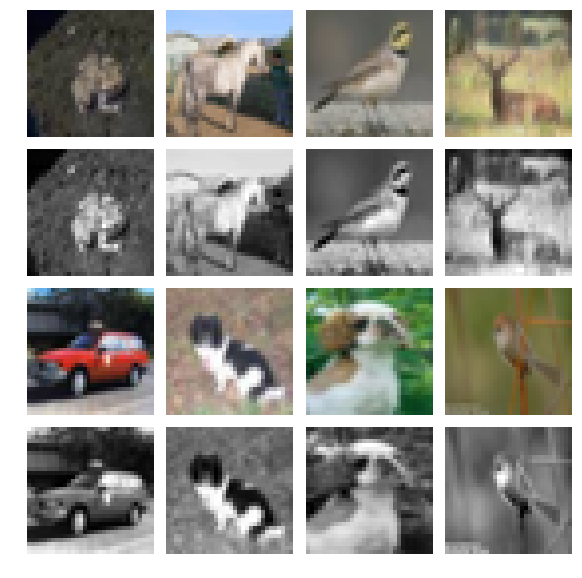

In [6]:
# Visualize rgb vs grayscale
n_rows = 4
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0, n_rows, 2):
    indexes = np.random.randint(0, n_train, size=n_cols)
    images = X_train[indexes]
    
    # original picture
    for i in range(n_cols):
        idx = i + j*n_cols
        axs[idx].axis('off')
        axs[idx].imshow(images[i])
    
    #gray scale image
    for i in range(n_cols):
        idx = i + j*n_cols + n_cols
        axs[idx].axis('off')
        axs[idx].imshow(to_grayscale(images[i]).squeeze(), cmap='gray')

## Notes
* some picture get more clear as we turn them into gray scale
* **This might give us guide to how to augment the training data**

# Data Augmentation
* Image Scale (smaller or bigger)
* Image Translation (shifting)
* Image Rotation
* Image Affine Transformation
* Warp Transformation
* Brightness Change

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


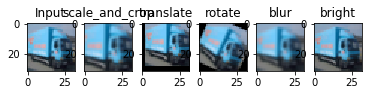

In [7]:
import cv2


def scale(image, scale=2):
    """
    This function scale the picture. scale > 1 means higher resolution, bigger picture
    """
    imshape = image.shape
    return cv2.resize(image, (np.int(imshape[1] * scale), np.int(imshape[0] * scale)))


def scale_and_crop(image, max_pixel=5):
    """
    This function scale the picture first, usually make its resolution smaller
    so the picture can focus on certain area and remove noise around boundry.
    And then crop the image to original size
    
    max_pixel: int
        maximum pixels can be change, exclusively
    """
    rows, cols, _ = image.shape
    px = np.random.randint(-max_pixel, max_pixel)
    # crop area
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # starting locations, the whole picture
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(image,M,(cols,rows,))
    if len(dst.shape) == 2:
        dst = dst[:,:,np.newaxis]
    return dst

def translate(image, max_pixels=5):
    """
    shifting original image so (0,0) -> (dx, dy)
    """
    rows, cols, _ = image.shape
    dx, dy = np.random.randint(-max_pixels, max_pixels, size=2)
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    dst = cv2.warpAffine(image, M, (cols, rows,))
    if len(dst.shape) == 2:
        dst = dst[:,:,np.newaxis]
    return dst

def rotate(image, max_angle=30):
    """
    rotate the image with the center (x/2, y/2) and random angle
    """
    rows, cols, _ = image.shape
    angle = np.random.randint(-max_angle, max_angle)
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    dst = cv2.warpAffine(image, M, (cols, rows,))
    if len(dst.shape) == 2:
        dst = dst[:,:,np.newaxis]
    return dst


def gaussian_blur(image, kernel_size=3):
    """
    Applies a Gaussian Noise kernel
    This might be good for better weather
    """
    dst = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    if len(dst.shape) == 2:
        dst = dst[:,:,np.newaxis]
    return dst


def random_brightness_rgb(image, min_ratio = 0.25):
    """
    This only works for image with RGB color
    """
    img = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = min_ratio + np.random.uniform()
    img[:,:,2] = img[:,:,2] * random_bright # change the brightness channel
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img 

def random_brightness_gray(image):
    """
    This works for gray scale image
    """
    shifted = image + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    img = shifted * coef - 1.0
    return img

idx = np.random.randint(0, n_train)
test_img = X_train[idx]
scale_img = scale_and_crop(test_img)
translate_img = translate(test_img)
rotate_img = rotate(test_img)
blur_img = gaussian_blur(test_img)
bright_img = random_brightness_rgb(test_img)
print(scale_img.shape)
print(translate_img.shape)
print(rotate_img.shape)
print(blur_img.shape)
print(bright_img.shape)
plt.subplot(161),plt.imshow(test_img),plt.title('Input')
plt.subplot(162),plt.imshow(scale_img),plt.title('scale_and_crop')
plt.subplot(163),plt.imshow(translate_img),plt.title('translate')
plt.subplot(164),plt.imshow(rotate_img),plt.title('rotate')
plt.subplot(165),plt.imshow(blur_img),plt.title('blur')
plt.subplot(166),plt.imshow(bright_img),plt.title('bright')
plt.show()

# Augmented Data Visualization

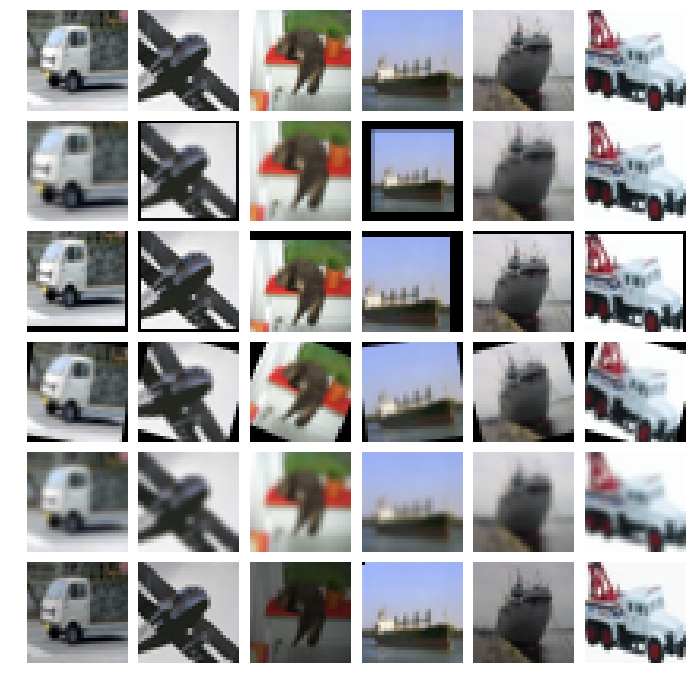

In [8]:
# plot the image for comparison
pre_processors = [None, scale_and_crop, translate, rotate, gaussian_blur, random_brightness_rgb]

n_rows = len(pre_processors)
n_cols = 6
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()

indexes = np.random.randint(0, n_train, size=n_cols)
images = X_train[indexes]

for j, func_j in enumerate(pre_processors):
    for i in range(n_cols):
        idx = i + j * n_cols
        axs[idx].axis('off')
        if not func_j: # None, means orignal picture
            axs[idx].imshow(images[i])
        else:
            axs[idx].imshow(func_j(images[i]))

# Pre_processing

In [388]:
# preprocess data
X_train_normalized = normalize(to_grayscale(X_train))
y_train_normalized = y_train
X_valid_normalized = normalize(to_grayscale(X_valid))
X_test_normalzied = normalize(to_grayscale(X_test))

# TODO: Number of training examples
n_train = len(y_train_normalized)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_normalized.shape[1:]
label_shape = y_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Label data shape =", label_shape)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Label data shape = ()


# Augmented Data Visualization after Preprocessing

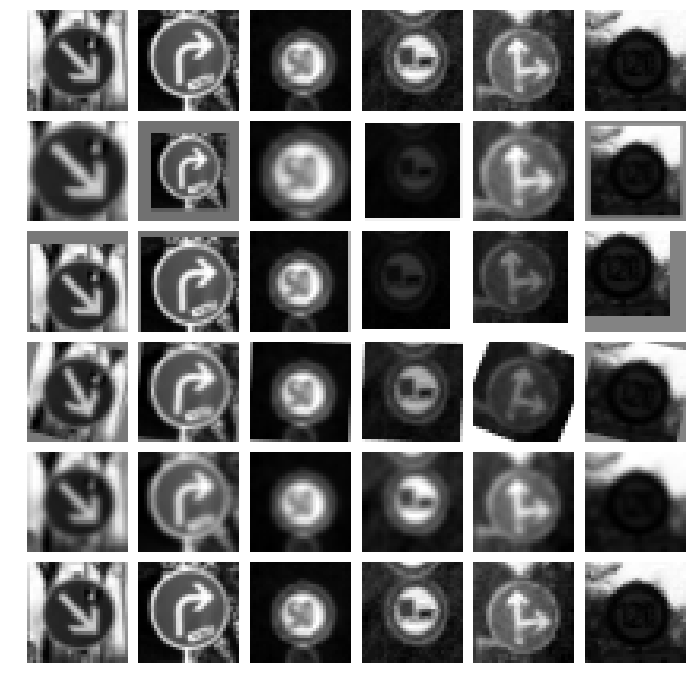

In [372]:
# plot the image for comparison
pre_processors = [None, scale_and_crop, translate, rotate, gaussian_blur, random_brightness_gray]

n_rows = len(pre_processors)
n_cols = 6
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()

indexes = np.random.randint(0, n_train, size=n_cols)
images = X_train_normalized[indexes]

for j, func_j in enumerate(pre_processors):
    for i in range(n_cols):
        idx = i + j * n_cols
        axs[idx].axis('off')
        if not func_j: # None, means orignal picture
            image = images[i]
            # print(image.shape)
            assert image.shape == (32, 32, 1)
            axs[idx].imshow(image.squeeze(), cmap='gray')
        else:
            image = func_j(images[i])
            # print([j, image.shape])
            assert image.shape == (32, 32, 1)
            axs[idx].imshow(image.squeeze(), cmap='gray')

# Augmented Training data set
* Try to augment those labels with less data

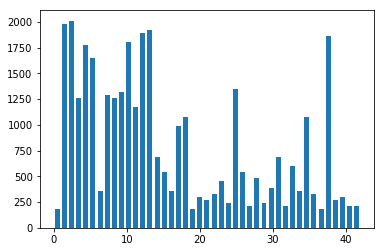

In [389]:
# histogram of label frequency before data augmentation
hist, bins = np.histogram(y_train_normalized, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [390]:
print("minimum samples for any label:", min(np.bincount(y_train_normalized)))
print("maximum samples for any label:", max(np.bincount(y_train_normalized)))

minimum samples for any label: 180
maximum samples for any label: 2010


In [391]:
# avaliable preprocessors
augment_funcs = [scale_and_crop, translate, rotate, gaussian_blur, random_brightness_gray]

def transform(image, funcs=augment_funcs, random=True):
    """
    Apply transform to a image
    
    funcs: list of functions
    random: boolean
        True: randomly choose one, then apply to this image
        False: apply alll functions
    """
    if random:
        idx = np.random.randint(0, len(funcs))
        return funcs[idx](image)
    else:
        for func in funcs:
            image = func(image)
        return image

print('X, y shapes:', X_train_normalized.shape, y_train_normalized.shape)

input_indices = []
output_indices = []
mimN_instances = 1000

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train_normalized == class_n)
    n_samples = len(class_indices[0])
    if n_samples < mimN_instances:
        # increase the number of this class to minN_instances
        for i in range(mimN_instances - n_samples):
            input_indices.append(class_indices[0][i % n_samples]) # choose which to augment/loop over
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            
            # transform the data, randomly apply one transformation
            new_img = transform(new_img, random=False)
            
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train_normalized = np.concatenate((y_train_normalized, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train_normalized.shape, y_train_normalized.shape)

# save augmented training files, they have been already preprocessed
aug_train = {'features': X_train_normalized, 'labels': y_train_normalized}
pickle.dump(aug_train, open('lenet/aug_train_all.p', 'wb'))
print('done saving')

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|----|----|----|----|
15 : |----|----|----|----|----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|----|----|----|----|---
17 : |
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----

# Data Visualization for Using Radom Augmentation Functions

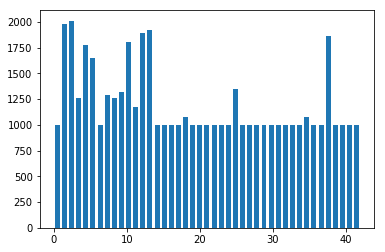

In [463]:
# histogram of label frequency before after augmentation
hist, bins = np.histogram(y_train_normalized, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
# plt.savefig('images/new_dist.jpg')
plt.show()

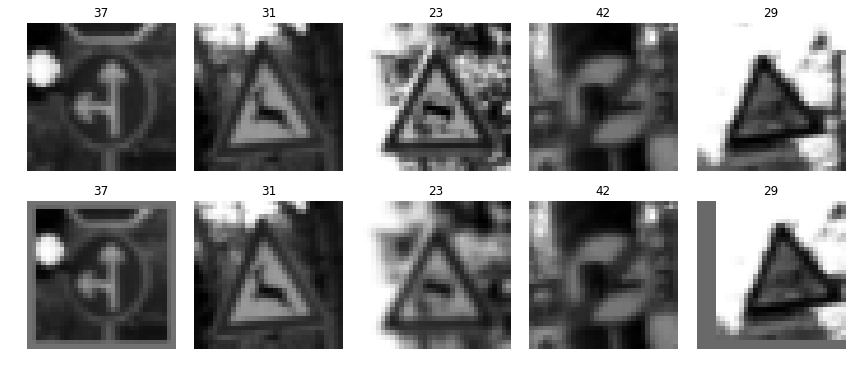

In [387]:
# show comparisons of 5 random augmented data points
choices = list(range(len(input_indices)))
picks = []
indexes = np.random.randint(0, len(input_indices))
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train_normalized[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train_normalized[output_indices[picks[i]]])

# Data Visualization for Using All Augmentation Functions

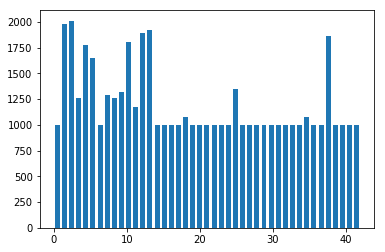

In [398]:
# histogram of label frequency before after augmentation
hist, bins = np.histogram(y_train_normalized, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

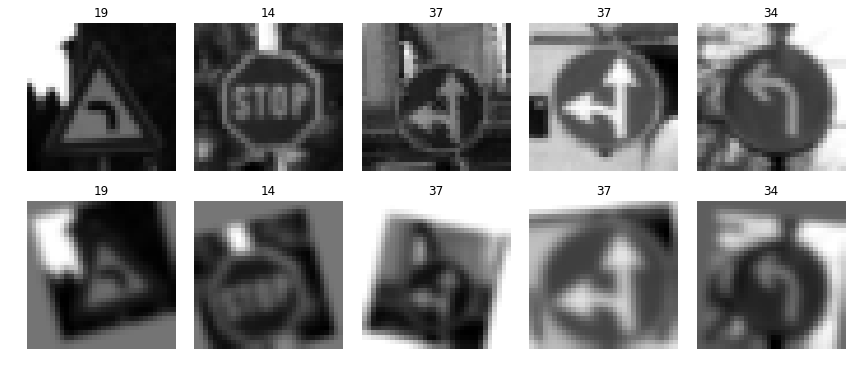

In [399]:
# show comparisons of 5 random augmented data points
choices = list(range(len(input_indices)))
picks = []
indexes = np.random.randint(0, len(input_indices))
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train_normalized[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train_normalized[input_indices[picks[i]]])
for i in range(5):
    image = X_train_normalized[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train_normalized[output_indices[picks[i]]])

In [417]:
# Load Augmented training data
with open('lenet/aug_train.p', mode = 'rb') as f:
    train_normalized = pickle.load(f)
X_train_normalized, y_train_normalized = train_normalized['features'], train_normalized['labels']

assert len(y_train_normalized) == len(X_train_normalized)
n_train = len(y_train_normalized)

assert len(X_valid_normalized) == len(y_valid)
n_validation = len(y_valid)

assert len(X_test_normalzied) == len(y_test)
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_normalized.shape[1:]
label_shape = y_train_normalized.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train_normalized))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("X data type =", X_train_normalized.dtype)  # data type uint8 cause potential problem for data transformation
print("Label data shape =", label_shape)
print("y data type =", y_train_normalized.dtype)
print("Number of classes =", n_classes)

Number of training examples = 51690
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
X data type = float64
Label data shape = ()
y data type = int64
Number of classes = 43


# LeNet Model Architecture

![LeNet-5 Architecture](images/lenet.png)
Implement the LeNet-5 deep neural network model.

### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x, n_channels=3, n_classes=43):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=[5, 5, n_channels, 6], mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(shape=[6]))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # stride has shape  (height, width, input_depth, output_depth)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(shape=[16]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv2_flatten = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=[400, 120], mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(shape=[120]))
    fc1 = tf.matmul(conv2_flatten, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=[120, 84], mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(shape=[84]))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=[84, n_classes], mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(shape=[n_classes]))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    logits = fc3
    
    return logits

def optimizer(name, learning_rate=0.001, momentum=0.9):
    """
    return a optimizer accroding different name, case insensitive
    """
    if name.lower() == 'adam':
        return tf.train.AdamOptimizer(learning_rate)
    elif name.lower() == 'momentum':
        return tf.train.MomentumOptimizer(learning_rate, momentum)
    elif name.lower() == 'adagrad':
        return tf.train.AdagradOptimizer(learning_rate)
    elif name.lower() == 'adadelta':
        return tf.train.AdadeltaOptimizer(learning_rate)
    else:
        return tf.train.GradientDescentOptimizer(learning_rate)
    

# Modified LeNet Model Architecture

![LeNet-modified](images/modifiedLeNet.jpeg)


This model came from [Lecun Yann's paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) The modification is simple
* Add one more convolutional layer (conv3) after previous conv2 running parallel the flatten operation
* The output dimension of conv3 is also 400 as flatten layer, they concatenate together as a output of 800 dimension
* Now the first fully connected layer needs to be (800, 120)
* **Note: This will increase greatly the number of parameters**

## Further Modification
* Add dropout layer after fully connected + relu

In [14]:
def LeNet2(x, n_channels=3, n_classes=43):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # keep_prob = 0.5
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=[5, 5, n_channels, 6], mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(shape=[6]))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # stride has shape  (height, width, input_depth, output_depth)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(shape=[16]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    # set a name for this operation, so we can get this for visualization
    conv2 = tf.nn.relu(conv2, name='conv2_relu')

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    
    # places modified
    conv3_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 16, 400], mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(shape=[400]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding='VALID') + conv3_b
    
    conv3 = tf.nn.relu(conv3)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400 + 400 = 800.
    conv2_flatten = flatten(conv2)
    conv3_flatten = flatten(conv3)
    concat_layer1 = tf.concat_v2([conv2_flatten, conv3_flatten], axis=1)
    
    # add dropout
    concat_layer1 = tf.nn.dropout(concat_layer1, keep_prob)
    
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=[800, n_classes], mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(shape=[n_classes]))
    fc1 = tf.matmul(concat_layer1, fc1_W) + fc1_b
    
    logits = fc1
    
    """
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # add dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=[120, 84], mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(shape=[84]))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=[84, n_classes], mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(shape=[n_classes]))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    logits = fc3
    """
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

n_channels = 3
n_classes = 10

epochs = 50
batch_size = 128
learning_rate = 0.001

# step 1: train network definition
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_ = 0.8

one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet2(x, n_channels=n_channels, n_classes=n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_ops = tf.reduce_mean(cross_entropy)
train_ops = optimizer('adam', learning_rate=learning_rate).minimize(loss_ops)

# step 2: evaluate network definition
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_ops = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, batch_size=128):
    """
    evaluate on the validation set or test set
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_ops, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += accuracy * len(batch_x)
    return total_accuracy / num_examples


# step 3, training the model 
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print('number training instances %s' % num_examples)
    
    for i in range(epochs):
        X_, y_ = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_[offset:offset+batch_size], y_[offset:offset+batch_size]
            sess.run(train_ops, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_})
        
        validation_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet/my-model-cifar10')
    print("Model saved")

number training instances 50000
EPOCH 1 ...
Validation Accuracy = 0.123

EPOCH 2 ...
Validation Accuracy = 0.123

EPOCH 3 ...
Validation Accuracy = 0.125

EPOCH 4 ...
Validation Accuracy = 0.140

EPOCH 5 ...
Validation Accuracy = 0.251

EPOCH 6 ...
Validation Accuracy = 0.344

EPOCH 7 ...
Validation Accuracy = 0.385

EPOCH 8 ...
Validation Accuracy = 0.403

EPOCH 9 ...
Validation Accuracy = 0.433

EPOCH 10 ...
Validation Accuracy = 0.440

EPOCH 11 ...
Validation Accuracy = 0.458

EPOCH 12 ...
Validation Accuracy = 0.472

EPOCH 13 ...
Validation Accuracy = 0.458

EPOCH 14 ...
Validation Accuracy = 0.469

EPOCH 15 ...
Validation Accuracy = 0.486

EPOCH 16 ...
Validation Accuracy = 0.482

EPOCH 17 ...
Validation Accuracy = 0.472

EPOCH 18 ...
Validation Accuracy = 0.483

EPOCH 19 ...
Validation Accuracy = 0.482

EPOCH 20 ...
Validation Accuracy = 0.479

EPOCH 21 ...
Validation Accuracy = 0.463

EPOCH 22 ...
Validation Accuracy = 0.467

EPOCH 23 ...
Validation Accuracy = 0.479

EPOCH 24 ..

# Log for Cifar10
* 2017/12/27 - Validation Accuracy: 44.5%
    * no preprocessing
    * model: original LeNet, batch size: 128, epochs: 10, rate: 0.001, mu: 0, sigma: 0.1

In [455]:
with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkoutpoint('.'))
    saver.restore(sess, './lenet/my-model-aug')
    
    train_accuracy = evaluate(X_train_normalized, y_train_normalized)
    print("Traning Accuracy = {:.3f}".format(train_accuracy))

Traning Accuracy = 0.995


In [452]:
# step 4: Evaluate the model
with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkoutpoint('.'))
    saver.restore(sess, './lenet/my-model-aug')
    
    test_accuracy = evaluate(X_test_normalzied, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.928


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

images/13.ppm
images/14.ppm
images/25.ppm
images/35.ppm
images/1.ppm
images/40.ppm


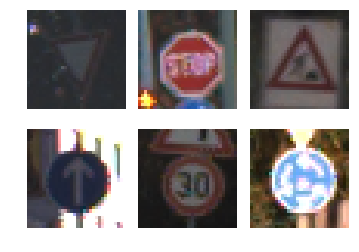

In [457]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

my_labels = np.array([13, 14, 25, 35, 1, 40])

fig, axs = plt.subplots(2,3, figsize=(6, 4))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []
for i, img in enumerate(glob.glob("images/*.ppm")):
    print(img)
    image = cv2.imread(img)
    # cv2.imwrite('images/%s.jpg' % my_labels[i], image)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)
plt.savefig('images/new_images.jpg')
my_images = np.asanyarray(my_images)

### Predict the Sign Type for Each Image

In [442]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
my_images_normalized = normalize(to_grayscale(my_images))
print(my_images_normalized.shape)
assert my_images_normalized.shape == (6, 32, 32, 1)

with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkoutpoint('.'))
    saver.restore(sess, './lenet/my-model-aug')
    
    prediction_ops = tf.argmax(logits, 1)
    predict_y = sess.run(prediction_ops, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    print("predicting labels are = %s" % predict_y)

(6, 32, 32, 1)
predicting labels are = [13 14 25 35  1 40]


### Analyze Performance

In [443]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkoutpoint('.'))
    saver.restore(sess, './lenet/my-model-aug')
    
    test_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [444]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkoutpoint('.'))
    saver.restore(sess, './lenet/my-model-aug')
    
    top_k_ops = tf.nn.top_k(tf.nn.softmax(logits), k=5)
    top_k = sess.run(top_k_ops, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    print("top 5 prediction for the instances with label %s \n" % my_labels)
    print(top_k)

top 5 prediction for the instances with label [13 14 25 35  1 40] 

TopKV2(values=array([[  9.98505592e-01,   8.10719735e-04,   3.02862638e-04,
          1.98851863e-04,   1.05666259e-04],
       [  1.00000000e+00,   1.28870447e-11,   1.49122045e-12,
          4.68216828e-13,   3.91026296e-13],
       [  9.99753892e-01,   2.40606911e-04,   2.30127944e-06,
          1.58757007e-06,   4.77834305e-07],
       [  9.99992371e-01,   7.17399462e-06,   4.07566290e-07,
          7.97884283e-08,   3.53484104e-08],
       [  9.98879492e-01,   1.09005708e-03,   1.55646449e-05,
          1.03181401e-05,   2.41872817e-06],
       [  9.99979496e-01,   6.61564309e-06,   6.27542749e-06,
          5.29720546e-06,   1.07007963e-06]], dtype=float32), indices=array([[13,  3, 15, 35, 39],
       [14, 17,  0, 40,  5],
       [25, 30, 20, 29, 31],
       [35, 34, 40,  3, 14],
       [ 1,  2, 19, 37,  0],
       [40, 26,  0, 12,  7]], dtype=int32))


From above results, we konw the model are almost 100% sure about the prediction.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [506]:
node_names = [tensor.name for tensor in tf.get_default_graph().as_graph_def().node]
for i, name in enumerate(node_names):
    if name == 'conv2_relu':
        print([i, name])

[93163, 'conv2_relu']


In [507]:
# I need rename all the variables to create the tf_activation, but I will leave it for future adjustment
tf_activation = tf.get_default_graph().as_graph_def().node[93163]

In [515]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

